## Import modules

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

## Generate data

In [3]:
# Generate data set 1
a, b = 2, 5
n = 100
np.random.seed(123)
data1 = np.random.beta(a, b, size=n)
print("data1 (3 first values):", data1[:3])

# Generate data set 2
a, b = 10, 5
n = 100
np.random.seed(123)
data2 = np.random.beta(a, b, size=n)
print("data2 (3 first values):", data2[:3])

data1 (3 first values): [0.079743   0.1001085  0.02233009]
data2 (3 first values): [0.48190481 0.46384746 0.50741647]


## Calculations

In [4]:
data1_mean = np.mean(data1)
print("data1 (mean):", data1_mean)

data2_mean = np.mean(data2)
print("data1 (mean):", data2_mean)

data1 (mean): 0.2682906798384101
data1 (mean): 0.6669931458932479


## Statistical calculations

In [5]:
# From https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

print ('----- DATA 1 -----')
# Run the  D’Agostino and Pearson’s test for sample x1
k, p = stats.normaltest(data1)
# Print the result
print(f"k={k}, p={p}")


alpha = 1e-3

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

print ('----- DATA 2 -----')
# Run the  D’Agostino and Pearson’s test for sample x1
k, p = stats.normaltest(data2)
# Print the result
print(f"k={k}, p={p}")

alpha = 0.05

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

----- DATA 1 -----
k=8.073871217619669, p=0.01765148066399961
The null hypothesis cannot be rejected
----- DATA 2 -----
k=12.63024082162971, p=0.0018087479546733938
The null hypothesis can be rejected


## Plot with Matplotlib

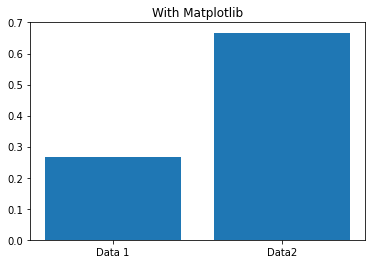

In [6]:
fig, ax = plt.subplots()
data_id = ['Data 1', 'Data2']
means = [data1_mean, data2_mean]
ax.bar(data_id,means)
plt.title("With Matplotlib")
plt.show()

## Convert data to Pandas 

In [7]:
data = {'data1': data1, 'data2': data2}
df = pd.DataFrame(data)
print (df)

       data1     data2
0   0.079743  0.481905
1   0.100109  0.463847
2   0.022330  0.507416
3   0.173128  0.633137
4   0.233838  0.687842
..       ...       ...
95  0.230918  0.718957
96  0.121328  0.784875
97  0.062475  0.746238
98  0.160504  0.820212
99  0.158931  0.756818

[100 rows x 2 columns]


## Plot with Seaborn

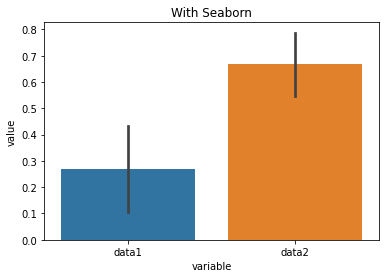

In [8]:
fig, ax = plt.subplots()

sns.barplot(x="variable", y="value", data=df.melt(), ci="sd")
plt.title("With Seaborn")
plt.show()

## Manipulate data with Pandas and create plots

Data from https://www.sheffield.ac.uk/polopoly_fs/1.570199!/file/stcp-Rdataset-Diet.csv

In [11]:
df_diet = pd.read_csv("../data/stcp-Rdataset-Diet.csv")
print (df_diet)

    Person gender  Age  Height  pre.weight  Diet  weight6weeks
0       25          41     171          60     2          60.0
1       26          32     174         103     2         103.0
2        1      0   22     159          58     1          54.2
3        2      0   46     192          60     1          54.0
4        3      0   55     170          64     1          63.3
..     ...    ...  ...     ...         ...   ...           ...
73      74      1   35     183          83     3          80.2
74      75      1   49     177          84     3          79.9
75      76      1   28     164          85     3          79.7
76      77      1   40     167          87     3          77.8
77      78      1   51     175          88     3          81.9

[78 rows x 7 columns]


In [12]:
# For each gender and diet, what was the delta in weight after 6 weeks?

df_diet['weight.delta'] = df_diet['pre.weight']-df_diet['weight6weeks']
print (df_diet)

    Person gender  Age  Height  pre.weight  Diet  weight6weeks  weight.delta
0       25          41     171          60     2          60.0           0.0
1       26          32     174         103     2         103.0           0.0
2        1      0   22     159          58     1          54.2           3.8
3        2      0   46     192          60     1          54.0           6.0
4        3      0   55     170          64     1          63.3           0.7
..     ...    ...  ...     ...         ...   ...           ...           ...
73      74      1   35     183          83     3          80.2           2.8
74      75      1   49     177          84     3          79.9           4.1
75      76      1   28     164          85     3          79.7           5.3
76      77      1   40     167          87     3          77.8           9.2
77      78      1   51     175          88     3          81.9           6.1

[78 rows x 8 columns]


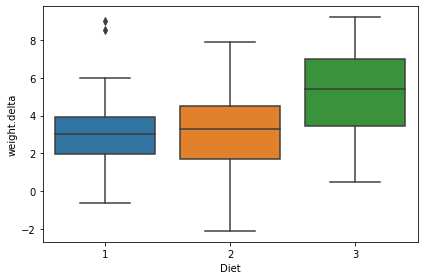

In [13]:
sns.boxplot(x="Diet", y="weight.delta", data=df_diet)

plt.tight_layout()
plt.show()

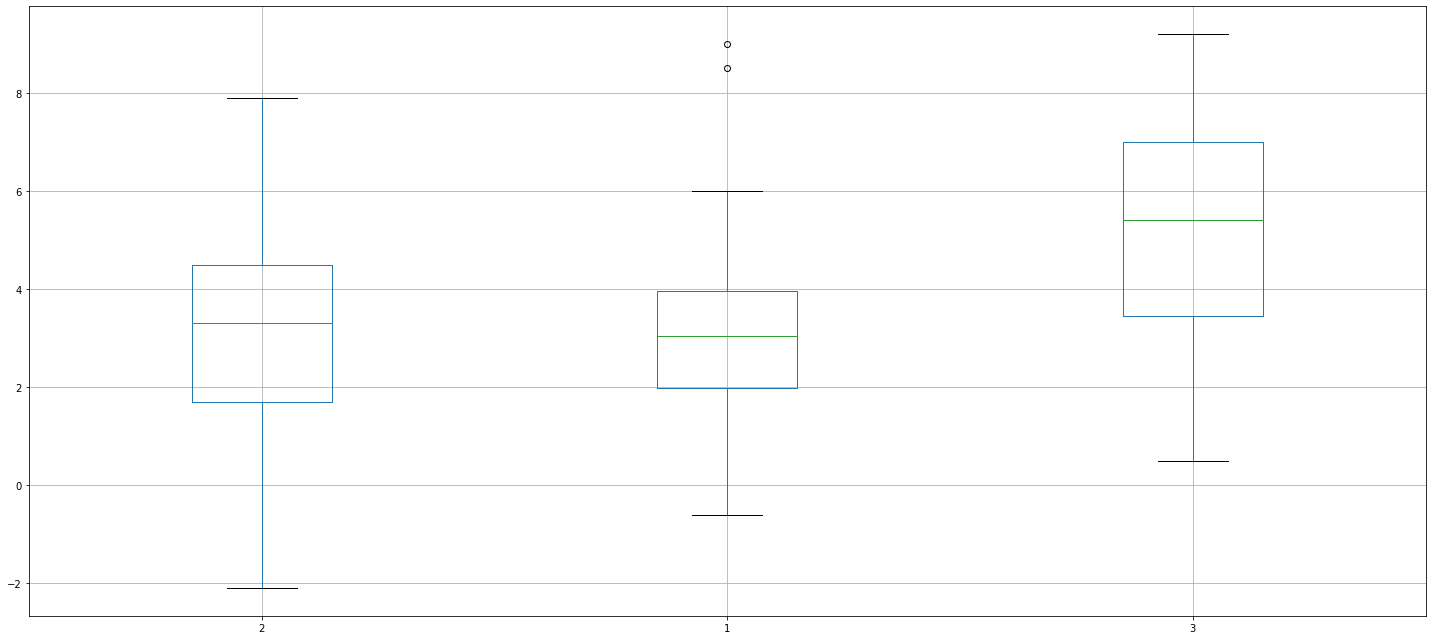

In [14]:
grouped_diet = df_diet.groupby('Diet')
diet_columns = df_diet.Diet.unique()

diet_data = {}

for group in diet_columns:
    diet_data[group] = grouped_diet.get_group(group)['weight.delta'].agg(lambda x: x.tolist())
    
df_box_diet = pd.DataFrame.from_dict(diet_data, orient='index')

plotted_diet = df_box_diet.transpose().boxplot(figsize=(20,9), return_type='both')
plt.tight_layout()

In [46]:
genders = df_diet.gender.unique()
diets = df_diet.Diet.unique()

# We want diet | gender | count in a dataframe

content = {
        k: [] for k in ("diet", "gender", "count")
    }

for diet in diets:
    for gender in genders:
        
        is_diet = df_diet.Diet == diet
        is_gender = df_diet.gender == gender
        df_cond_d = df_diet[is_diet & is_gender]
        
        content['diet'].append(diet)
        content['gender'].append(gender)
        content['count'].append(df_cond_d['Person'].count())

df_plot = pd.DataFrame(content)
print (df_plot)

   diet gender  count
0     2             2
1     2      0     14
2     2      1     11
3     1             0
4     1      0     14
5     1      1     10
6     3             0
7     3      0     15
8     3      1     12


Text(0.5, 0, 'diet')

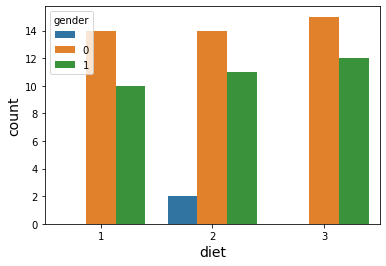

In [42]:
fig, ax = plt.subplots()
sns.barplot(x="diet", y="count", hue="gender",
                ax=ax,
                data=df_plot)
ax.set_ylabel("count", size=14)
ax.set_xlabel("diet", size=14)